## Start of Question 1, including importation of modules I may need for the question. ##

In [17]:
import networkx as nx
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
import igraph as ig
from collections import Counter

Below is a function that creates a erdos graph when given a number of nodes "n" and a probability of any one node having an edge to another node, "p".

In [18]:
def gnp_random_graph(n, p):
    """
    Generates a random undirected graph, similar to an Erdos Graph
    """
    edges = itertools.combinations(range(n), 2) #creates a list of all possible edges between the n nodes of the graph
    G = nx.Graph() # generate a networkx graph
    G.add_nodes_from(range(n)) #add n nodes to the graph named G
    if p <= 0:
        return G # If there is no possiblity of connection between nodes we return the graph with kust nodes
    if p >= 1:
        return nx.complete_graph(n, create_using=G) #if there is 1 probability of the connection of nodes then we use every possible edge, as generated above
    for _, node_edges in itertools.groupby(edges, key=lambda x: x[0]): 
        node_edges = list(node_edges) 
        for e in node_edges:
            if random.random() < p:#for any other value, for every possible edge generate a p value and if it is within our p paramater above, add it to the graph
                G.add_edge(*e)
    return G

Functions below taken from problem sheets


In [19]:
def d(p,q):
    ""
    return np.sqrt(sum([p[i]-q[i]])**2 for i in range(len(p))) 

def distances(ps):
    ""
    nps = len(ps)
    return np.array([[d(ps[i],ps[j]) for j in range(nps)]for i in range(nps)])

def is_simplex(g, vs):
    ""
    for i in vs:
        for j in vs:
            if i != j and j not in g[i]:
                return False
    return True

def simplices(g,k):
    ""
    ss = []
    for i in g.keys():
        vvs = [j for j in g[i] if j>1]
        for subset in itertools.combinations(vvs, k):
            if is_simplex(g, subset):
                ss.append((i,) + subset)
    return ss


The below function takes a number of nodes and chosen value from bzero etc, and plots values of probability versus that value for that node number

In [20]:
def question1func(nodes, verse):
    ""
    plt.figure(figsize=(10,10))
    n = nodes
    pxs = np.linspace(0,1, 100) # creates a list of all possible odds between 1 and 100% for the probability value
    pxs = [ round(elem, 3) for elem in pxs ] # rounds above list
    yxs=[] #creates an empty list for the y vals we will plot against the probability values
    if verse == "Bzero":
        for i in pxs:
            G = gnp_random_graph(n, i)
            Gedgelist = nx.edges(G)
            Gnodelist = nx.nodes(G)
            Gedgenum = len(Gedgelist)
            Gnodenum = len(Gnodelist)
            Bzero = nx.number_connected_components(G)
            yxs.append(Bzero) # this generates random graphs for every value in the probability list and appends the value for Bzero for that graph into a list to plot against pxs
        
        
    elif verse == "XG":
        for i in pxs:
            G = gnp_random_graph(n, i)
            Gedgelist = nx.edges(G)
            Gnodelist = nx.nodes(G)
            Gedgenum = len(Gedgelist)
            Gnodenum = len(Gnodelist)
            XG = Gnodenum - Gedgenum
            yxs.append(XG) # this generates random graphs for every value in the probability list and appends the value for the euler characteristic for that graph into a list to plot against pxs
        
    elif verse == "Bone":
        for i in pxs:
            G = gnp_random_graph(n, i)
            Gedgelist = nx.edges(G)
            Gnodelist = nx.nodes(G)
            Gedgenum = len(Gedgelist)
            Gnodenum = len(Gnodelist)
            Bzero = nx.number_connected_components(G)
            XG = Gnodenum - Gedgenum
            Bone = Bzero - XG
            yxs.append(Bone) # this generates random graphs for every value in the probability list and appends the value for Bone for that graph into a list to plot against pxs
    
    elif verse == "Virus":
        for i in pxs:
            G = gnp_random_graph(n, i)
            Gedgelist = nx.edges(G)
            Gnodelist = nx.nodes(G)
            Gedgenum = len(Gedgelist)
            Gnodenum = len(Gnodelist)
            Bzero = nx.number_connected_components(G)
            XG = Gnodenum - Gedgenum
            Bone = Bzero - XG
            if Bzero != 1:
                yxs.append(0)
            elif Bzero == 1:
                yxs.append(1)
            for i in yxs:
                if i == 1:
                    first = list.index(i) #this elif virus clause is similar to above but creates a list wherein we see at what point the full graph was connected (i.e the virus would spread)
                break
            
    
    return plt.plot(pxs,yxs)

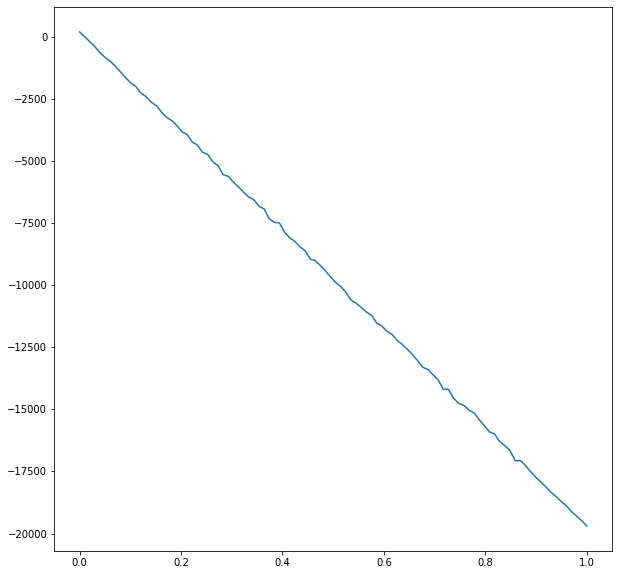

In [21]:
question1func(200, "XG")

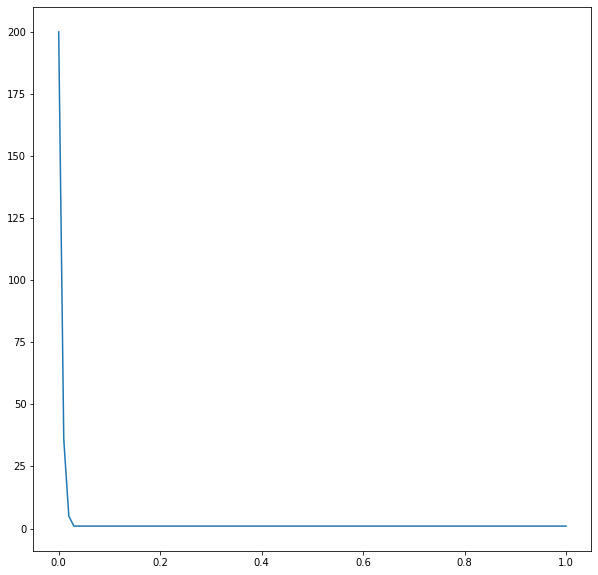

In [22]:
question1func(200, "Bzero")

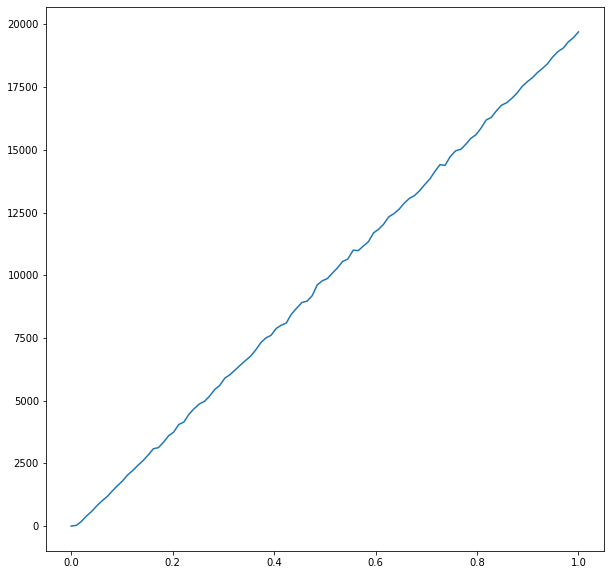

In [23]:
question1func(200, "Bone")

In [25]:
def whenfullinfected(nodes, number, start, stop, gaps):
    "here number is the amount of times we want to produce a graph of this nature"
    list = []
    n = nodes
    pxs = np.linspace(start,stop,gaps)
    pxs = [ round(elem, 3) for elem in pxs ]
    yxs=[]
    for j in range(number):
        for a in pxs:
            G = gnp_random_graph(n, a)
            Gedgelist = nx.edges(G)
            Gnodelist = nx.nodes(G)
            Gedgenum = len(Gedgelist)
            Gnodenum = len(Gnodelist)
            Bzero = nx.number_connected_components(G)
            XG = Gnodenum - Gedgenum
            Bone = Bzero - XG
            if Bzero == 1: 
                yxs.append(1)
                list.append(a)
                break
    return list #this function returns the values at which for this node number ends up fully infected

In [26]:
def calcer(nodes, number, start, stop, gaps):
    list = whenfullinfected(nodes, number, start, stop, gaps)
    fullcount = Counter(list)
    return fullcount #this is the function above but loops and creates a counter list of where the bzero = 1 ie. pandemic status

In [27]:
calcer(200, 500, 0, 0.1, 25)

Counter({0.033: 111, 0.025: 146, 0.029: 188, 0.038: 30, 0.021: 23, 0.042: 2})

In [28]:
def firstonlycalcer(nodes, number, start, stop, gaps):
    list = whenfullinfected(nodes, number, start, stop, gaps)
    fullcount = Counter(list)
    #print(fullcount)
    return min(fullcount.keys()) # this is similar to above but outputs the lowest valueat which the graph would be fully infected

In [29]:
firstonlycalcer(200,100,0,0.1,25)

0.021

In [30]:
def nchangecalcer(nstart,nstop,nstep,number, start, stop, gaps):
    n = np.linspace(nstart,nstop, nstep, dtype=int)
    when = {}
    fullyat = []
    h = -1
    for i in n:
        z = firstonlycalcer(int(i), number,start, stop, gaps)
        fullyat.append(z)
    for a in n:
        h += 1
        when[a] = fullyat[h]
            
    keys = when.keys()
    values = when.values()
    return when

In [31]:
nchangecalcer(1,500,50,50,0,0.5,100)

{1: 0.0,
 11: 0.101,
 21: 0.071,
 31: 0.071,
 41: 0.061,
 51: 0.04,
 62: 0.051,
 72: 0.045,
 82: 0.035,
 92: 0.035,
 102: 0.03,
 113: 0.03,
 123: 0.035,
 133: 0.03,
 143: 0.03,
 153: 0.025,
 163: 0.025,
 174: 0.02,
 184: 0.025,
 194: 0.025,
 204: 0.025,
 214: 0.02,
 225: 0.02,
 235: 0.015,
 245: 0.02,
 255: 0.02,
 265: 0.02,
 275: 0.015,
 286: 0.015,
 296: 0.015,
 306: 0.015,
 316: 0.015,
 326: 0.015,
 337: 0.015,
 347: 0.015,
 357: 0.015,
 367: 0.015,
 377: 0.015,
 387: 0.015,
 398: 0.015,
 408: 0.015,
 418: 0.015,
 428: 0.015,
 438: 0.015,
 449: 0.015,
 459: 0.01,
 469: 0.01,
 479: 0.01,
 489: 0.01,
 500: 0.01}

In [32]:
def finalq1check(nstart,nstop,nstep,number, start, stop, gaps):
    ""
    a = nchangecalcer(nstart,nstop,nstep,number, start, stop, gaps)
    b = nchangecalcer(nstart,nstop,nstep,number, start, stop, gaps)
    c = nchangecalcer(nstart,nstop,nstep,number, start, stop, gaps)

    sums= Counter()
    counters = Counter()
    for itemset in [a,b,c]:
        sums.update(itemset)
        counters.update(itemset.keys())
    
    ret = {x: float(sums[x])/counters[x] for x in sums.keys()}
    keys = ret.keys()
    values = ret.values()
    plt.plot(keys,values)

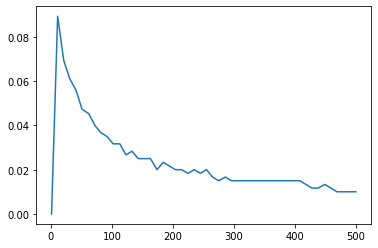

In [33]:
finalq1check(1,500,50,100,0,0.5,100)